# 1 - Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

In [2]:
#função para calcular o MAPE(Erro Percentual Absoluto Médio)
def mape(y_pred,y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 2 - Importação dos dados

In [3]:
data = pd.read_csv('prime.csv',header=0,index_col=0).sort_index()

# 3 -  Criação do  vetor de caracteristicas X e do vetor resposta y 

In [4]:
x_data = []
y_data = []

# 3.1 Preenchimento

### Usamos os 6 meses anteriores(X) para prever o próximo mês(y)

In [5]:
for d in range(6,data.shape[0]):
    x = data.iloc[d-6:d].values.ravel()
    y = data.iloc[d].values[0]
    x_data.append(x)
    y_data.append(y)

In [6]:
x_data = np.array(x_data)
y_data = np.array(y_data)
y_pred = [] #lista com todos os y previstos com linear regression
y_pred_mlp = []
y_pred_last = []
y_pred_ma = []
y_true = []

> Usei mlpregressor (rede neural com camada única de 100 neuronios), linear regression e a média móvel para ilustrar oque o professor falou sobre redes neurais as vezes não se sairem tão bem

In [7]:
end = len(y_data)
for i in range(30,end):

    x_train = x_data[:i,:]
    y_train = y_data[:i]
    
    x_test = x_data[i,:]
    y_test = y_data[i]


    regr = MLPRegressor( max_iter=1000).fit(x_train, y_train.ravel())
    y_pred_mlp.append(regr.predict([x_test]))
    
    
    model = LinearRegression(normalize=True).fit(x_train,y_train)

    y_pred.append(model.predict([x_test]))
    y_pred_last.append(x_test[-1])
    y_pred_ma.append(x_test.mean())
    y_true.append(y_test)



In [12]:
#Transforma as listas em arrays numpy para facilitar os cálculos
y_pred = np.array(y_pred)
y_pred_last = np.array(y_pred_last)
y_pred_ma = np.array(y_pred_ma)
y_true = np.array(y_true)


#Imprime os erros na tela
print('\nMean Absolute Percentage Error')
print ('MAPE Regressão Linear', mape(y_pred,y_true))
print ('MAPE Último Valor', mape(y_pred_last,y_true))
print ('MAPE Média Móvel', mape(y_pred_ma,y_true))
print ('MAE MLPRegressor', mean_absolute_error(y_pred_mlp,y_true))

print ('\nMean Absolute Error')
print ('MAE Regressão Linear', mean_absolute_error(y_pred,y_true))
print ('MAE Último Valor', mean_absolute_error(y_pred_last,y_true))
print ('MAE Média Móvel', mean_absolute_error(y_pred_ma,y_true))
print ('MAE MLPRegressor', mean_absolute_error(y_pred_mlp,y_true))


Mean Absolute Percentage Error
MAPE Regressão Linear 17.652676714326322
MAPE Último Valor 2.7677439037812333
MAPE Média Móvel 7.903860891718388

Mean Absolute Error
MAE Regressão Linear 0.2840871878813478
MAE Último Valor 0.427831325301205
MAE Média Móvel 1.1985140562248995
MAE MLPRegressor 1.7510981434398314


In [9]:
#Faz o teste Wilcoxon Signed-Rank para determinar significado estatístico da diferença nos erros
error_linreg = abs(y_true - y_pred.ravel())
error_last = abs(y_true - y_pred_last)

In [10]:
print('Wilcoxon P-value', wilcoxon(error_linreg,error_last))

Wilcoxon P-value WilcoxonResult(statistic=997.0, pvalue=0.0007067680195027006)


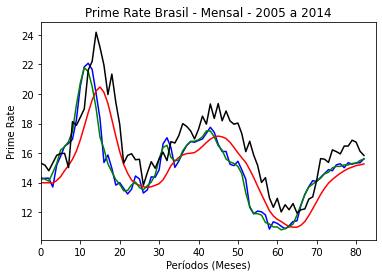

In [11]:
plt.title('Prime Rate Brasil - Mensal - 2005 a 2014')
plt.ylabel('Prime Rate')
plt.xlabel(u'Períodos (Meses)')
plt.plot(y_pred,color='b',label='Regressão Linear')
plt.plot(y_pred_ma,color='r',label='Média móvel')
plt.plot(y_true,color='g', label='Valores Reais')
plt.plot(y_pred_mlp,color='k', label='Valores Reais')
plt.xlim([0,85])
plt.legend = True
plt.show()
